In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import math

In [2]:
data = pd.read_csv("mnist.csv")


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

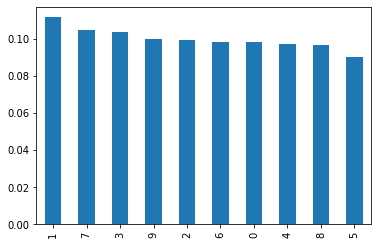

In [4]:
data.label.value_counts(normalize=True).plot(kind ="bar")

In [5]:
# Plots the image represented by a row
def plot_number(row):
    label = row[0]
    pixels = row[1:]

    pixels = pixels.reshape((28,28))

    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')

# Plots a whole slice of pictures
def plot_slice(rows):
    num = rows.shape[0]
    w = 4
    h = math.ceil(num / w)
    fig, plots = plt.subplots(h, w)
    fig.tight_layout()

    for n in range(0, num):
        s = plt.subplot(h, w, n+1)
        s.set_xticks(())
        s.set_yticks(())
        plot_number(rows[n])
    plt.show()

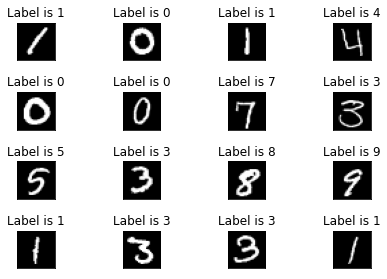

In [6]:
plot_slice(data.iloc[:16].values)

In [7]:
X = data.drop("label",axis= 1)
y= data["label"]
X= X.values /255

In [8]:
X_train,X_test,y_train,y_test =train_test_split(X,y)

In [9]:
%%time
pca = PCA(n_components= 64)
pca.fit(X_train)
X_train_pca =pca.transform(X_train)
X_train_pca =pca.transform(X_test)

CPU times: user 21.5 s, sys: 9.84 s, total: 31.4 s
Wall time: 5.08 s


In [10]:
pca.explained_variance_ratio_.sum()

0.8626867183654756

In [11]:
X_train_pca.shape,X_train_pca.shape

((10500, 64), (10500, 64))

In [12]:
%%time
svm = SVC()
model = GridSearchCV(svm,param_grid={
    "C" :[0.01,0.1,1],
},n_jobs= -1,cv=3)
model.fit(X_train,y_train)


CPU times: user 1min 11s, sys: 278 ms, total: 1min 12s
Wall time: 20min 32s


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1, param_grid={'C': [0.01, 0.1, 1]})

In [13]:
model.best_params_

{'C': 1}

In [14]:
model.score(X_test,y_test)

0.9766666666666667